## Project Description:

#### General Instruction
- Read data into Jupyter notebook using pandas to import data into a data frame. 

#### Required Tasks
- Explore each data set using different descriptive and plotting methods. 
- Explore each dataset, check for missing data, and apply proper data imputation methods. 
- Apply the same preprocessing techniques on the classification_test and regression_test. Note that these two datasets don't have target columns. 
- Scale each dataset. Explain your choice of data scaling method. 
- Apply clustering methods discussed in class to study the structure of each dataset. Discuss how the outcome of clustering will help you better understand the structure of data. Provide result interpretation for each clustering model. 
- Regression dataset: Apply all the regression models you have learned in this class. Discuss the results and outcomes. Models with hyperparameters explain how you find the best value of the hyperparameters. 
- Find the best regression model among the list of models trained on the regression_train dataset. Use this model to predict the target values of the regression_test. 
- Classification dataset: Apply all the classification models you have learned in this course. Discuss the results and outcomes. Discuss the choice of evaluation method and how it helps you find the best values of the model hyperparameters. 
- Find the best classification model among the list of models trained on the classification_train dataset. Use this model to predict the target values of the classification_test. 





# Regression

### Data preparation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<h4> Import the Data (Train Data)<h4>

In [3]:
# Load the train dataset into a DataFrame
df=pd.read_csv("/Users/saivamshipalakurthi/Downloads/Regression_train.csv",index_col=0)
# Display the first 5 rows of the DataFrame
df.head(5)

,Crash ID,Crash Date,Crash Severity,Crash Time,Day of Week,Nearest Trauma Center Distance,Time Arrived,Time Notified,Time Roadway Cleared,Weather Condition,Autonomous Level Engaged,Autonomous Unit - Reported,Vehicle Damage Rating 1 - Severity,Vehicle Model Year,Person Age,Person Alcohol Result,Person Drug Test Result,Person Ethnicity,Person Gender
0,NaN,5/1/2023,N - NOT INJURED,16:04,NaN,No Data,No Data,No Data,16:26,1 - CLEAR,0 - NO AUTOMATION,2 - NO,3 - DAMAGED 3,2019,19,No Data,97 - NOT APPLICABLE,H - HISPANIC,1 - MALE
1,19524300.0,5/1/2023,NaN,17:49,MONDAY,5.916,17:59,17:52,19:08,1 - CLEAR,0 - NO AUTOMATION,2 - NO,4 - DAMAGED 4,2006,37,No Data,97 - NOT APPLICABLE,W - WHITE,2 - FEMALE
2,19524300.0,5/1/2023,C - POSSIBLE INJURY,17:49,MONDAY,5.916,17:59,17:52,19:08,1 - CLEAR,0 - NO AUTOMATION,2 - NO,1 - DAMAGED 1 MINIMUM,2008,NaN,No Data,97 - NOT APPLICABLE,W - WHITE,1 - MALE
3,19524300.0,5/1/2023,C - POSSIBLE INJURY,17:49,MONDAY,5.916,NaN,17:52,19:08,1 - CLEAR,0 - NO AUTOMATION,2 - NO,3 - DAMAGED 3,2018,23,No Data,97 - NOT APPLICABLE,W - WHITE,1 - MALE
4,19524300.0,5/1/2023,C - POSSIBLE INJURY,17:49,MONDAY,5.916,17:59,17:52,19:08,1 - CLEAR,0 - NO AUTOMATION,2 - NO,3 - DAMAGED 3,2018,24,No Data,No Data,W - WHITE,1 - MALE


<h4> Import the Data (Test Data)<h4>

In [4]:
# Load the test dataset into a DataFrame
df_test=pd.read_csv("/Users/saivamshipalakurthi/Downloads/Regression_test.csv",index_col=0)
# Display the first 5 rows of the DataFrame
df_test.head(5)

,Crash ID,Crash Date,Crash Severity,Day of Week,Nearest Trauma Center Distance,Time Arrived,Time Notified,Weather Condition,Autonomous Level Engaged,Autonomous Unit - Reported,Vehicle Damage Rating 1 - Severity,Vehicle Model Year,Person Age,Person Alcohol Result,Person Drug Test Result,Person Ethnicity,Person Gender
0,19896631.0,11/30/2023,N - NOT INJURED,THURSDAY,No Data,No Data,No Data,6 - FOG,0 - NO AUTOMATION,2 - NO,2 - DAMAGED 2,2010,19,No Data,97 - NOT APPLICABLE,W - WHITE,1 - MALE
1,19568388.0,5/26/2023,N - NOT INJURED,FRIDAY,No Data,No Data,No Data,1 - CLEAR,0 - NO AUTOMATION,2 - NO,3 - DAMAGED 3,2015,59,No Data,97 - NOT APPLICABLE,W - WHITE,1 - MALE
2,19675565.0,7/29/2023,N - NOT INJURED,SATURDAY,No Data,No Data,No Data,1 - CLEAR,0 - NO AUTOMATION,2 - NO,3 - DAMAGED 3,2009,41,No Data,97 - NOT APPLICABLE,B - BLACK,2 - FEMALE
3,19636995.0,7/6/2023,N - NOT INJURED,THURSDAY,No Data,No Data,No Data,1 - CLEAR,0 - NO AUTOMATION,2 - NO,3 - DAMAGED 3,2020,56,No Data,97 - NOT APPLICABLE,W - WHITE,2 - FEMALE
4,19605340.0,6/15/2023,N - NOT INJURED,THURSDAY,No Data,No Data,No Data,1 - CLEAR,0 - NO AUTOMATION,2 - NO,3 - DAMAGED 3,2019,31,No Data,97 - NOT APPLICABLE,B - BLACK,1 - MALE


<h4> Preprocessing <h4>


In [5]:
# Specify the datetime format for 'Crash Time' and 'Time Roadway Cleared' columns
datetime_format = "%H:%M"

# Convert 'Crash Time' and 'Time Roadway Cleared' columns to datetime objects
df['Crash Time'] = pd.to_datetime(df['Crash Time'], format=datetime_format, errors='coerce')
df['Time Roadway Cleared'] = pd.to_datetime(df['Time Roadway Cleared'], format=datetime_format, errors='coerce')

# Calculate the time taken for roadway clearance
df['Roadway Clearance Time'] = df['Time Roadway Cleared'] - df['Crash Time']

# Convert the time difference to total seconds (optional)
df['Roadway Clearance Time'] = df['Roadway Clearance Time'].dt.total_seconds()/60

# Display the DataFrame with the new column
df.head(5)

,Crash ID,Crash Date,Crash Severity,Crash Time,Day of Week,Nearest Trauma Center Distance,Time Arrived,Time Notified,Time Roadway Cleared,Weather Condition,Autonomous Level Engaged,Autonomous Unit - Reported,Vehicle Damage Rating 1 - Severity,Vehicle Model Year,Person Age,Person Alcohol Result,Person Drug Test Result,Person Ethnicity,Person Gender,Roadway Clearance Time
0,NaN,5/1/2023,N - NOT INJURED,1900-01-01 16:04:00,NaN,No Data,No Data,No Data,1900-01-01 16:26:00,1 - CLEAR,0 - NO AUTOMATION,2 - NO,3 - DAMAGED 3,2019,19,No Data,97 - NOT APPLICABLE,H - HISPANIC,1 - MALE,22.0
1,19524300.0,5/1/2023,NaN,1900-01-01 17:49:00,MONDAY,5.916,17:59,17:52,1900-01-01 19:08:00,1 - CLEAR,0 - NO AUTOMATION,2 - NO,4 - DAMAGED 4,2006,37,No Data,97 - NOT APPLICABLE,W - WHITE,2 - FEMALE,79.0
2,19524300.0,5/1/2023,C - POSSIBLE INJURY,1900-01-01 17:49:00,MONDAY,5.916,17:59,17:52,1900-01-01 19:08:00,1 - CLEAR,0 - NO AUTOMATION,2 - NO,1 - DAMAGED 1 MINIMUM,2008,NaN,No Data,97 - NOT APPLICABLE,W - WHITE,1 - MALE,79.0
3,19524300.0,5/1/2023,C - POSSIBLE INJURY,1900-01-01 17:49:00,MONDAY,5.916,NaN,17:52,1900-01-01 19:08:00,1 - CLEAR,0 - NO AUTOMATION,2 - NO,3 - DAMAGED 3,2018,23,No Data,97 - NOT APPLICABLE,W - WHITE,1 - MALE,79.0
4,19524300.0,5/1/2023,C - POSSIBLE INJURY,1900-01-01 17:49:00,MONDAY,5.916,17:59,17:52,1900-01-01 19:08:00,1 - CLEAR,0 - NO AUTOMATION,2 - NO,3 - DAMAGED 3,2018,24,No Data,No Data,W - WHITE,1 - MALE,79.0


In [6]:
# Now drop the Crash Time and Time Roadway cleared columns
df.drop(columns=['Crash Time'], inplace=True)
df.drop(columns=['Time Roadway Cleared'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5376 entries, 0 to 5375
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Crash ID                            5266 non-null   float64
 1   Crash Date                          5267 non-null   object 
 2   Crash Severity                      5259 non-null   object 
 3   Day of Week                         5264 non-null   object 
 4   Nearest Trauma Center Distance      5266 non-null   object 
 5   Time Arrived                        5283 non-null   object 
 6   Time Notified                       5264 non-null   object 
 7   Weather Condition                   5376 non-null   object 
 8   Autonomous Level Engaged            5273 non-null   object 
 9   Autonomous Unit - Reported          5274 non-null   object 
 10  Vehicle Damage Rating 1 - Severity  5269 non-null   object 
 11  Vehicle Model Year                  5273 non-nul

In [8]:
# Clean up strings in specified columns by removing prefixes and whitespace
df['Crash Severity'] = df['Crash Severity'].str.split('-').str[-1].str.strip()
df['Weather Condition'] = df['Weather Condition'].str.split('-').str[-1].str.strip()
df['Autonomous Level Engaged'] = df['Autonomous Level Engaged'].str.split('-').str[-1].str.strip()
df['Autonomous Unit - Reported'] = df['Autonomous Unit - Reported'].str.split('-').str[-1].str.strip()
df['Vehicle Damage Rating 1 - Severity'] = df['Vehicle Damage Rating 1 - Severity'].str.split('-').str[-1].str.strip()
df['Person Drug Test Result'] = df['Person Drug Test Result'].str.split('-').str[-1].str.strip()
df['Person Ethnicity'] = df['Person Ethnicity'].str.split('-').str[-1].str.strip()
df['Person Gender'] = df['Person Gender'].str.split('-').str[-1].str.strip()
df['Person Alcohol Result'] = df['Person Alcohol Result'].str.split('-').str[-1].str.strip()

In [9]:
# Visualize the data
df.head(5)


,Crash ID,Crash Date,Crash Severity,Day of Week,Nearest Trauma Center Distance,Time Arrived,Time Notified,Weather Condition,Autonomous Level Engaged,Autonomous Unit - Reported,Vehicle Damage Rating 1 - Severity,Vehicle Model Year,Person Age,Person Alcohol Result,Person Drug Test Result,Person Ethnicity,Person Gender,Roadway Clearance Time
0,NaN,5/1/2023,NOT INJURED,NaN,No Data,No Data,No Data,CLEAR,NO AUTOMATION,NO,DAMAGED 3,2019,19,No Data,NOT APPLICABLE,HISPANIC,MALE,22.0
1,19524300.0,5/1/2023,NaN,MONDAY,5.916,17:59,17:52,CLEAR,NO AUTOMATION,NO,DAMAGED 4,2006,37,No Data,NOT APPLICABLE,WHITE,FEMALE,79.0
2,19524300.0,5/1/2023,POSSIBLE INJURY,MONDAY,5.916,17:59,17:52,CLEAR,NO AUTOMATION,NO,DAMAGED 1 MINIMUM,2008,NaN,No Data,NOT APPLICABLE,WHITE,MALE,79.0
3,19524300.0,5/1/2023,POSSIBLE INJURY,MONDAY,5.916,NaN,17:52,CLEAR,NO AUTOMATION,NO,DAMAGED 3,2018,23,No Data,NOT APPLICABLE,WHITE,MALE,79.0
4,19524300.0,5/1/2023,POSSIBLE INJURY,MONDAY,5.916,17:59,17:52,CLEAR,NO AUTOMATION,NO,DAMAGED 3,2018,24,No Data,No Data,WHITE,MALE,79.0


In [10]:
# Check for missing values in the DataFrame
df.isna().sum()

Crash ID                              110
Crash Date                            109
Crash Severity                        117
Day of Week                           112
Nearest Trauma Center Distance        110
Time Arrived                           93
Time Notified                         112
Weather Condition                       0
Autonomous Level Engaged              103
Autonomous Unit - Reported            102
Vehicle Damage Rating 1 - Severity    107
Vehicle Model Year                    103
Person Age                            119
Person Alcohol Result                  91
Person Drug Test Result               127
Person Ethnicity                        0
Person Gender                         108
Roadway Clearance Time                  0
dtype: int64

In [11]:
# Clean up strings in specified columns by removing prefixes and whitespace for "Test Data"
df_test['Crash Severity'] = df_test['Crash Severity'].str.split('-').str[-1].str.strip()
df_test['Weather Condition'] = df_test['Weather Condition'].str.split('-').str[-1].str.strip()
df_test['Autonomous Level Engaged'] = df_test['Autonomous Level Engaged'].str.split('-').str[-1].str.strip()
df_test['Autonomous Unit - Reported'] = df_test['Autonomous Unit - Reported'].str.split('-').str[-1].str.strip()
df_test['Vehicle Damage Rating 1 - Severity'] = df_test['Vehicle Damage Rating 1 - Severity'].str.split('-').str[-1].str.strip()
df_test['Person Drug Test Result'] = df_test['Person Drug Test Result'].str.split('-').str[-1].str.strip()
df_test['Person Ethnicity'] = df_test['Person Ethnicity'].str.split('-').str[-1].str.strip()
df_test['Person Gender'] = df_test['Person Gender'].str.split('-').str[-1].str.strip()
df_test['Person Alcohol Result'] = df_test['Person Alcohol Result'].str.split('-').str[-1].str.strip()

In [12]:
df_test.head(10)

,Crash ID,Crash Date,Crash Severity,Day of Week,Nearest Trauma Center Distance,Time Arrived,Time Notified,Weather Condition,Autonomous Level Engaged,Autonomous Unit - Reported,Vehicle Damage Rating 1 - Severity,Vehicle Model Year,Person Age,Person Alcohol Result,Person Drug Test Result,Person Ethnicity,Person Gender
0,19896631.0,11/30/2023,NOT INJURED,THURSDAY,No Data,No Data,No Data,FOG,NO AUTOMATION,NO,DAMAGED 2,2010,19,No Data,NOT APPLICABLE,WHITE,MALE
1,19568388.0,5/26/2023,NOT INJURED,FRIDAY,No Data,No Data,No Data,CLEAR,NO AUTOMATION,NO,DAMAGED 3,2015,59,No Data,NOT APPLICABLE,WHITE,MALE
2,19675565.0,7/29/2023,NOT INJURED,SATURDAY,No Data,No Data,No Data,CLEAR,NO AUTOMATION,NO,DAMAGED 3,2009,41,No Data,NOT APPLICABLE,BLACK,FEMALE
3,19636995.0,7/6/2023,NOT INJURED,THURSDAY,No Data,No Data,No Data,CLEAR,NO AUTOMATION,NO,DAMAGED 3,2020,56,No Data,NOT APPLICABLE,WHITE,FEMALE
4,19605340.0,6/15/2023,NOT INJURED,THURSDAY,No Data,No Data,No Data,CLEAR,NO AUTOMATION,NO,DAMAGED 3,2019,31,No Data,NOT APPLICABLE,BLACK,MALE
5,19755803.0,9/13/2023,NOT INJURED,WEDNESDAY,No Data,No Data,No Data,CLOUDY,NO AUTOMATION,NO,DAMAGED 3,2012,49,No Data,NOT APPLICABLE,HISPANIC,MALE
6,19974757.0,1/10/2024,NOT INJURED,WEDNESDAY,7.286,10:10,09:55,CLEAR,NaN,NO,DAMAGED 2,2022,NaN,No Data,NOT APPLICABLE,WHITE,FEMALE
7,19886833.0,11/21/2023,NOT INJURED,TUESDAY,No Data,No Data,No Data,CLOUDY,NO AUTOMATION,NO,DAMAGED 2,2024,33,No Data,NOT APPLICABLE,WHITE,MALE
8,20002821.0,1/27/2024,NOT INJURED,SATURDAY,2.088,20:27,20:18,CLEAR,NO AUTOMATION,NO,DAMAGED 2,2008,37,No Data,No Data,HISPANIC,FEMALE
9,19900972.0,12/3/2023,NOT INJURED,SUNDAY,No Data,No Data,No Data,CLEAR,NO AUTOMATION,NO,DAMAGED 2,2019,4,NaN,No Data,BLACK,FEMALE


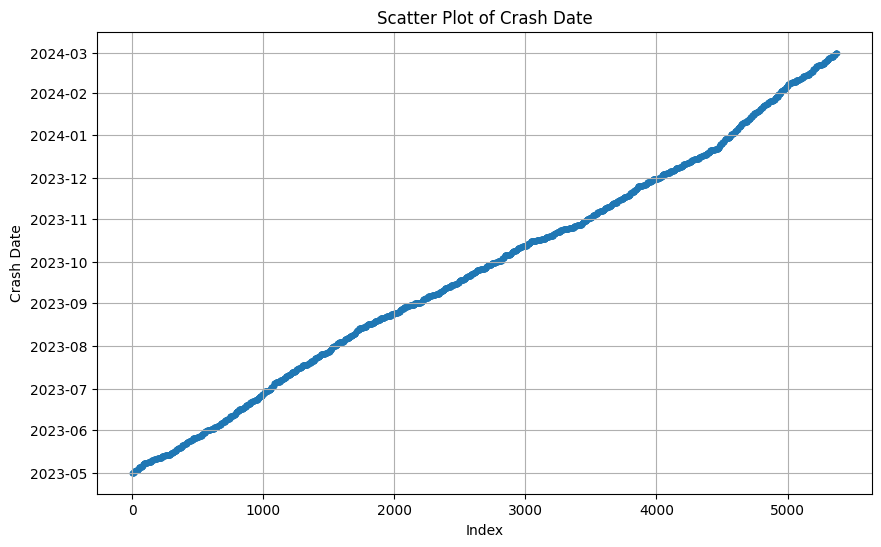

In [13]:
# Convert 'Crash Date' column to datetime format "Train Data"
df['Crash Date'] = pd.to_datetime(df['Crash Date'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Crash Date'], marker='.')
plt.title('Scatter Plot of Crash Date')
plt.xlabel('Index')
plt.ylabel('Crash Date')
plt.grid(True)
plt.show()


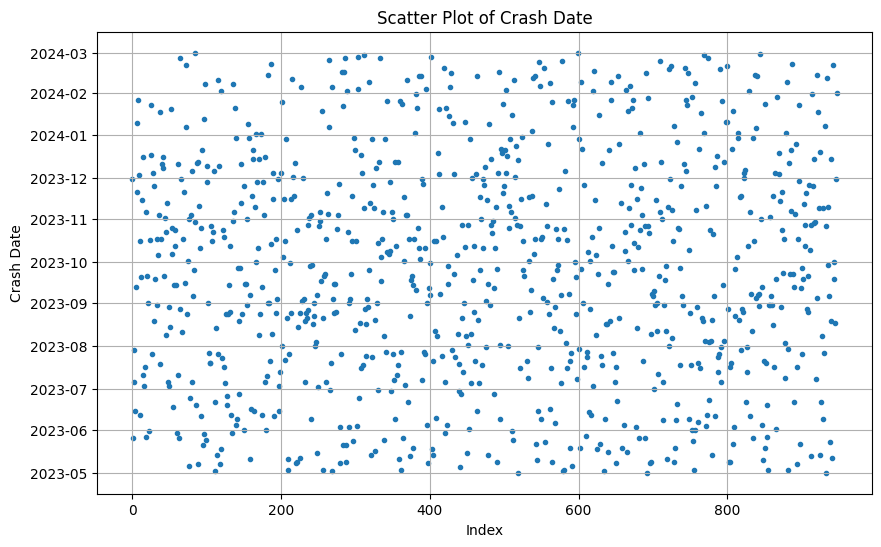

In [14]:
# Convert 'Crash Date' column to datetime format "Test Data"
df_test['Crash Date'] = pd.to_datetime(df_test['Crash Date'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_test.index, df_test['Crash Date'], marker='.')
plt.title('Scatter Plot of Crash Date')
plt.xlabel('Index')
plt.ylabel('Crash Date')
plt.grid(True)
plt.show()


In [15]:
# Sort the DataFrame by 'Crash Date' to arrange in chronological order
df_test = df_test.sort_values(by='Crash Date').reset_index(drop=True)

# Display the sorted DataFrame
df_test

,Crash ID,Crash Date,Crash Severity,Day of Week,Nearest Trauma Center Distance,Time Arrived,Time Notified,Weather Condition,Autonomous Level Engaged,Autonomous Unit - Reported,Vehicle Damage Rating 1 - Severity,Vehicle Model Year,Person Age,Person Alcohol Result,Person Drug Test Result,Person Ethnicity,Person Gender
0,19545429.0,2023-05-01,NOT INJURED,MONDAY,No Data,No Data,No Data,CLEAR,NO AUTOMATION,NO,DAMAGED 2,2014,30,No Data,NOT APPLICABLE,WHITE,FEMALE
1,19527648.0,2023-05-01,POSSIBLE INJURY,MONDAY,No Data,No Data,No Data,CLEAR,NO AUTOMATION,NO,DAMAGED 2,2015,22,No Data,NOT APPLICABLE,WHITE,MALE
2,19521585.0,2023-05-01,NOT INJURED,MONDAY,No Data,No Data,No Data,CLEAR,NO AUTOMATION,NO,DAMAGED 3,2006,63,No Data,NOT APPLICABLE,HISPANIC,FEMALE
3,19522283.0,2023-05-02,SUSPECTED MINOR INJURY,TUESDAY,No Data,No Data,No Data,CLEAR,NO AUTOMATION,NO,DAMAGED 1 MINIMUM,2016,31,No Data,NOT APPLICABLE,HISPANIC,MALE
4,19544145.0,2023-05-02,NOT INJURED,TUESDAY,No Data,No Data,No Data,CLEAR,NO AUTOMATION,NO,DAMAGED 2,2019,40,No Data,NOT APPLICABLE,WHITE,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,19951336.0,NaT,UNKNOWN,SATURDAY,No Data,No Data,No Data,CLEAR,NO AUTOMATION,NO,DAMAGED 3,2020,65,No Data,NaN,WHITE,FEMALE
944,19725123.0,NaT,NOT INJURED,MONDAY,No Data,No Data,No Data,CLEAR,NO AUTOMATION,NO,DAMAGED 2,2020,25,No Data,NOT APPLICABLE,WHITE,FEMALE
945,19680308.0,NaT,NOT INJURED,WEDNESDAY,No Data,No Data,No Data,No Data,NO AUTOMATION,NO,DAMAGED 2,2009,21,No Data,NOT APPLICABLE,BLACK,FEMALE
946,19685816.0,NaT,NOT INJURED,TUESDAY,No Data,No Data,No Data,CLEAR,NO AUTOMATION,NO,DAMAGED 1 MINIMUM,2019,32,No Data,NOT APPLICABLE,WHITE,FEMALE


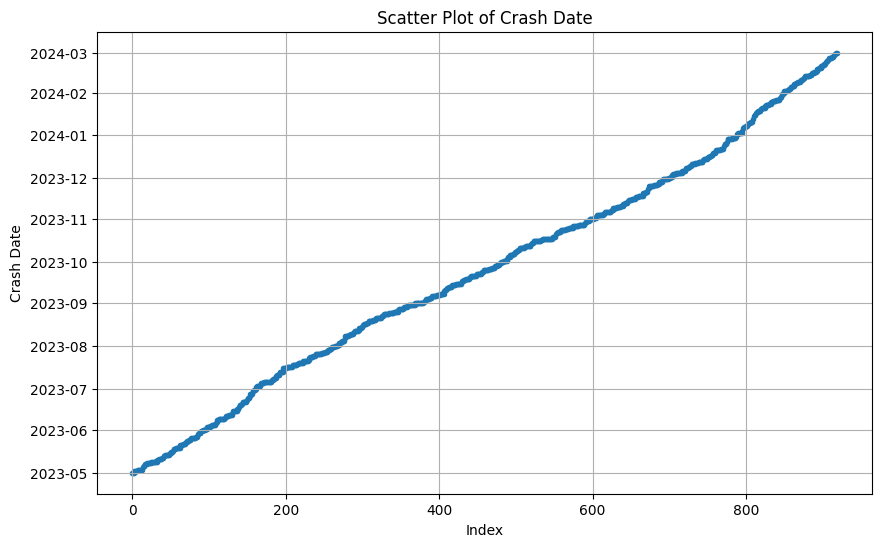

In [16]:
# Convert 'Crash Date' column to datetime format "Test Data"
df_test['Crash Date'] = pd.to_datetime(df_test['Crash Date'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_test.index, df_test['Crash Date'], marker='.')
plt.title('Scatter Plot of Crash Date')
plt.xlabel('Index')
plt.ylabel('Crash Date')
plt.grid(True)
plt.show()


In [17]:
# Train Data
# For crash date there are 109 missing values since the values are in chronological order 
# Forward fill NaN values in the 'Crash Date' column
df['Crash Date'] = df['Crash Date'].ffill()

# Backward fill NaN values in the 'Crash Date' column
df['Crash Date'] = df['Crash Date'].bfill()

In [18]:
df_test.isna().sum()

Crash ID                              18
Crash Date                            29
Crash Severity                        20
Day of Week                           24
Nearest Trauma Center Distance        21
Time Arrived                          14
Time Notified                         18
Weather Condition                      0
Autonomous Level Engaged              19
Autonomous Unit - Reported            22
Vehicle Damage Rating 1 - Severity    20
Vehicle Model Year                    12
Person Age                            19
Person Alcohol Result                 15
Person Drug Test Result               17
Person Ethnicity                       0
Person Gender                         22
dtype: int64

In [19]:
# Test Data
# For crash date there are 29 missing values since the values are in chronological order 
# You can propagate the last valid observation forward (ffill) or use the next valid observation to fill backward (bfill).
# Forward fill NaN values in the 'Crash Date' column
df_test['Crash Date'] = df_test['Crash Date'].ffill()

# Backward fill NaN values in the 'Crash Date' column
df_test['Crash Date'] = df_test['Crash Date'].bfill()

In [20]:
# Train Data
df['Crash Severity'].unique()

array(['NOT INJURED', nan, 'POSSIBLE INJURY', 'UNKNOWN',
       'SUSPECTED MINOR INJURY', 'SUSPECTED SERIOUS INJURY',
       'FATAL INJURY'], dtype=object)

In [21]:
# Test Data
df_test['Crash Severity'].unique()

array(['NOT INJURED', 'POSSIBLE INJURY', 'SUSPECTED MINOR INJURY',
       'UNKNOWN', 'SUSPECTED SERIOUS INJURY', nan, 'FATAL INJURY'],
      dtype=object)

In [22]:
# Fill the NaN values with 'UNKNOWN'
df['Crash Severity']=df['Crash Severity'].fillna('UNKNOWN')
df_test['Crash Severity']=df_test['Crash Severity'].fillna('UNKNOWN')

In [23]:
# Train data
df['Day of Week'].unique()

array([nan, 'MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY',
       'SATURDAY', 'SUNDAY'], dtype=object)

In [24]:
# Test Data
df_test['Day of Week'].unique()

array(['MONDAY', 'TUESDAY', 'WEDNESDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY',
       'THURSDAY', nan], dtype=object)

In [25]:
# Since the missing values of Crash date column are imputed with forward and backward fill same goes to day of the week
# Forward fill NaN values in the 'Crash Date' column
df['Day of Week'] = df['Day of Week'].ffill()
df_test['Day of Week'] = df_test['Day of Week'].ffill()

# Backward fill NaN values in the 'Crash Date' column
df['Day of Week'] = df['Day of Week'].bfill()
df_test['Day of Week'] = df_test['Day of Week'].bfill()


In [26]:
# Train Data
df['Nearest Trauma Center Distance'].unique()

array(['No Data', '5.916', nan, '0.886', '2.11', '2.72', '2.836', '7.142',
       '4.459', '2.264', '0.452', '4.354', '4.489', '2.397', '0.219',
       '3.618', '1.123', '0.626', '10.527', '4.031', '5.749', '7.469',
       '1.065', '4.523', '5.247', '0.039', '3.615', '2.38', '0.813',
       '3.656', '4.234', '0.893', '2.09', '7.266', '7.055', '0.983',
       '2.104', '2.326', '0.332', '5.251', '5.518', '3.359', '4.898',
       '3.07', '2.025', '0.541', '0.776', '0.537', '4.167', '2.117',
       '0.12', '4.09', '4.169', '4.416', '3.584', '6.83', '0.673',
       '3.986', '1.128', '3.546', '1.042', '6.117', '4.15', '3.578',
       '3.902', '1.056', '4.532', '7.287', '5.104', '4.325', '4.428',
       '5.98', '0.988', '5.137', '1.84', '2.088', '3.991', '5.685',
       '1.382', '5.43', '1.28', '3.107', '5.755', '2.971', '3.061',
       '5.395', '0.719', '0.385', '2.033', '6.001', '3.384', '4.859',
       '7.565', '4.522', '4.668', '4.41', '3.962', '3.563', '5.363',
       '3.954', '5.324', '

In [27]:
# Test Data
df_test['Nearest Trauma Center Distance'].unique()

array(['No Data', nan, '7.142', '4.459', '0.452', '4.489', '2.397',
       '3.618', '1.065', '5.919', '4.636', '3.656', '7.286', '0.332',
       '2.09', '7.266', '2.025', '4.409', '2.553', '3.902', '5.916',
       '5.98', '0.988', '4.428', '3.991', '5.137', '1.382', '1.28',
       '2.971', '4.522', '6.59', '7.565', '2.087', '1.927', '0.164',
       '0.572', '2.088', '1.834', '1.974', '0.246', '5.823', '1.354',
       '4.627', '2.133', '3.588', '3.532', '7.296', '3.881', '1.569',
       '3.488', '1.326', '1.058', '3.432', '1.302', '5.782', '1.285',
       '2.998', '7.309', '6.098', '1.31', '2.453', '4.562', '3.36',
       '5.931', '4.534', '7.402', '5.659', '2.491', '4.354', '6.024',
       '2.97', '0.425', '0.104', '3.118', '0.856', '4.337', '1.041',
       '6.032', '1.704', '5.721', '2.585', '0.501', '0.131', '4.45',
       '3.145', '4.531', '1.056', '9.714', '5.406', '1.539', '2.102',
       '1.566', '1.042', '5.598', '6.068', '1.123', '7.996', '4.566',
       '5.542'], dtype=object)

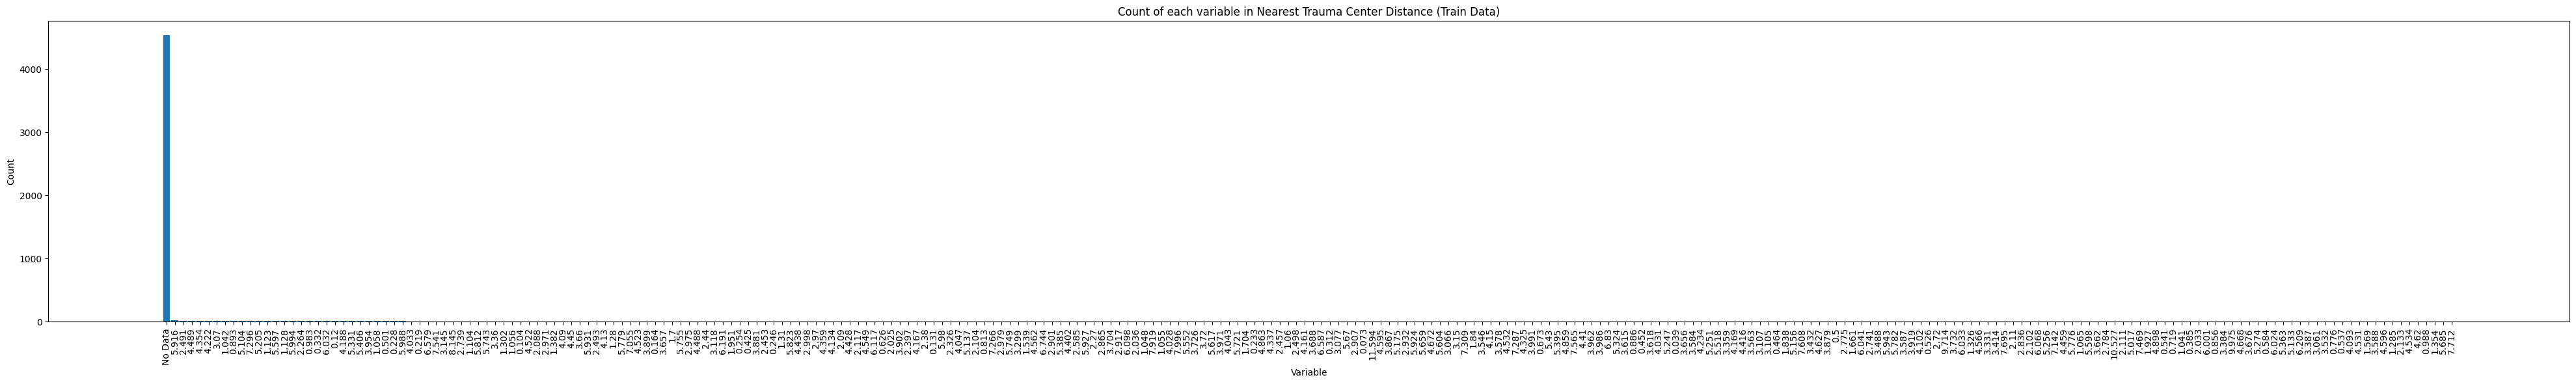

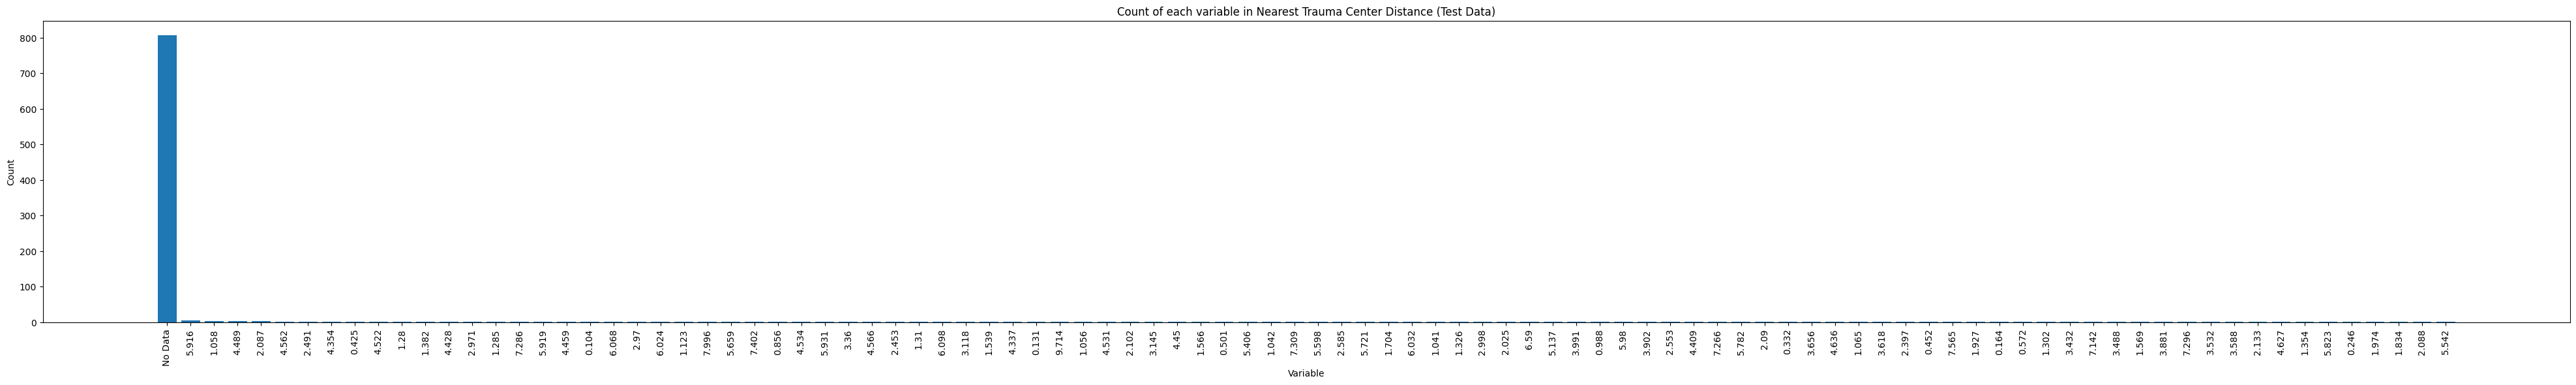

In [28]:
value_counts = df['Nearest Trauma Center Distance'].value_counts()
value_counts
counts = value_counts.values
variables = value_counts.index

# Plot the count of each unique variable
plt.figure(figsize=(50, 6))
plt.bar(variables, counts)
plt.title('Count of each variable in Nearest Trauma Center Distance (Train Data)')
plt.xlabel('Variable')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

value_counts = df_test['Nearest Trauma Center Distance'].value_counts()
value_counts
counts = value_counts.values
variables = value_counts.index

# Plot the count of each unique variable
plt.figure(figsize=(50, 6))
plt.bar(variables, counts)
plt.title('Count of each variable in Nearest Trauma Center Distance (Test Data)')
plt.xlabel('Variable')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [29]:
# Since the 'Nearest Trauma Center Distance' column has mostly No data we can drop the column to avoid introducing noise into our analysis.
df.drop(columns=['Nearest Trauma Center Distance'], inplace=True)
df_test.drop(columns=['Nearest Trauma Center Distance'], inplace=True)

In [30]:
# Train Data
df['Time Arrived'].unique()

array(['No Data', '17:59', nan, '19:44', '08:49', '23:53', '09:05',
       '11:10', '04:31', '19:02', '11:31', '18:44', '11:03', '21:46',
       '19:46', '04:05', '02:47', '08:43', '13:41', '05:30', '05:33',
       '13:39', '19:56', '20:32', '16:47', '17:12', '12:16', '14:25',
       '10:27', '07:13', '20:11', '23:34', '10:06', '16:53', '18:21',
       '05:04', '22:46', '10:35', '09:15', '04:17', '10:00', '12:51',
       '18:04', '02:50', '13:20', '19:59', '09:43', '13:45', '16:58',
       '13:00', '14:43', '10:04', '11:05', '14:15', '17:00', '16:31',
       '08:35', '17:25', '15:16', '09:03', '20:30', '11:49', '18:00',
       '19:14', '11:45', '16:30', '17:39', '12:00', '17:10', '13:06',
       '14:00', '13:21', '18:17', '16:52', '13:38', '09:50', '17:13',
       '01:29', '02:21', '21:15', '14:17', '10:03', '14:03', '09:19',
       '19:50', '18:47', '13:34', '17:45', '15:27', '18:39', '06:08',
       '16:20', '18:40', '11:14', '10:30', '17:08', '20:27', '17:26',
       '07:29', '21:40

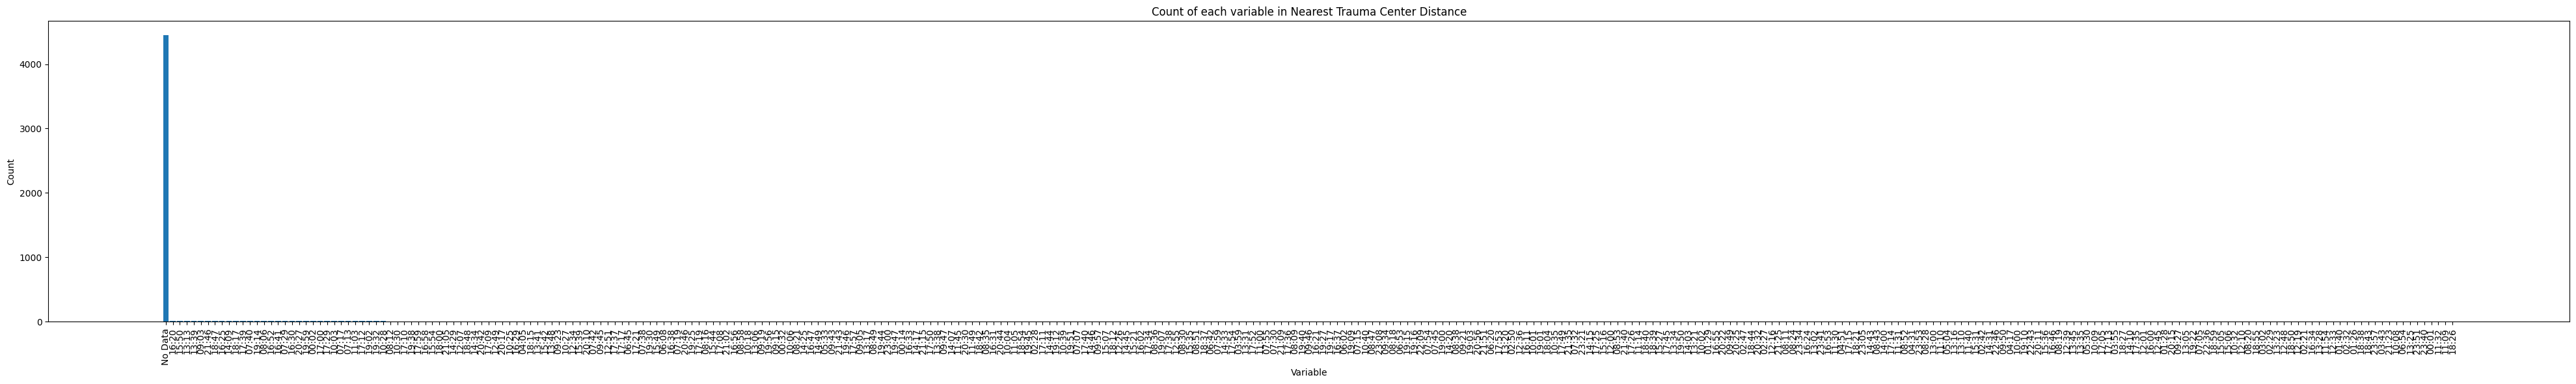

In [31]:
value_counts = df['Time Arrived'].value_counts()
value_counts
counts = value_counts.values
variables = value_counts.index

# Plot the count of each unique variable
plt.figure(figsize=(50, 6))
plt.bar(variables, counts)
plt.title('Count of each variable in Nearest Trauma Center Distance')
plt.xlabel('Variable')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [32]:
# Since the 'Time Arrived' column has mostly No data we can drop the column to avoid introducing noise into our analysis.
df.drop(columns=['Time Arrived'], inplace=True)
df_test.drop(columns=['Time Arrived'], inplace=True)

In [33]:
df['Time Notified'].unique()

array(['No Data', '17:52', nan, '19:26', '08:42', '23:27', '09:05',
       '10:59', '04:23', '18:56', '11:31', '18:34', '21:42', '19:30',
       '03:27', '02:38', '08:39', '13:29', '05:23', '05:30', '13:38',
       '19:55', '20:11', '16:39', '16:56', '12:10', '19:44', '13:21',
       '14:25', '10:18', '07:04', '20:06', '23:34', '09:42', '16:53',
       '18:16', '04:55', '22:24', '10:23', '09:15', '04:07', '10:00',
       '10:13', '12:43', '18:03', '02:37', '12:57', '19:54', '13:42',
       '16:55', '11:07', '14:29', '09:59', '11:04', '13:01', '16:44',
       '16:26', '08:31', '17:21', '15:14', '08:59', '20:07', '11:49',
       '17:49', '19:05', '11:33', '17:10', '12:00', '16:45', '13:06',
       '13:15', '18:06', '16:33', '13:35', '09:50', '17:13', '00:59',
       '02:12', '21:15', '14:00', '09:37', '14:02', '09:17', '18:44',
       '13:32', '17:45', '15:24', '18:26', '18:36', '06:03', '17:30',
       '16:09', '18:25', '11:03', '10:25', '17:05', '18:51', '17:23',
       '07:18', '21:39

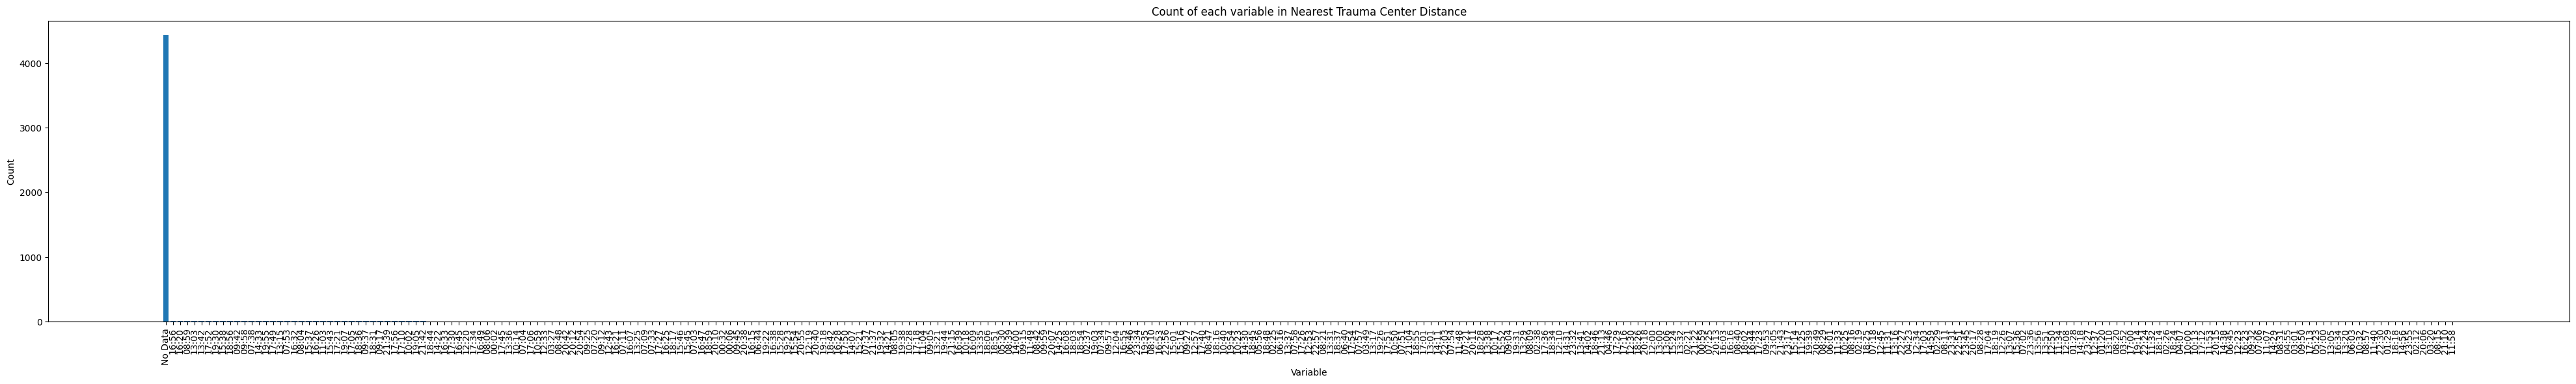

In [34]:
value_counts = df['Time Notified'].value_counts()
value_counts
counts = value_counts.values
variables = value_counts.index

# Plot the count of each unique variable
plt.figure(figsize=(50, 6))
plt.bar(variables, counts)
plt.title('Count of each variable in Nearest Trauma Center Distance')
plt.xlabel('Variable')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [35]:
# Since the 'Time Notified' column has mostly No data we can drop the column to avoid introducing noise into our analysis.
df.drop(columns=['Time Notified'], inplace=True)
df_test.drop(columns=['Time Notified'], inplace=True)

In [36]:
df['Autonomous Level Engaged'].unique()

array(['NO AUTOMATION', 'UNKNOWN', nan], dtype=object)

In [37]:
# Fill the NaN values with 'UNKNOWN'
df['Autonomous Level Engaged']=df['Autonomous Level Engaged'].fillna('UNKNOWN')
df_test['Autonomous Level Engaged']=df_test['Autonomous Level Engaged'].fillna('UNKNOWN')

In [38]:
df['Autonomous Unit - Reported'].unique()

array(['NO', 'UNKNOWN', nan], dtype=object)

In [39]:
# Fill the NaN values with 'UNKNOWN'
df['Autonomous Unit - Reported']=df['Autonomous Unit - Reported'].fillna('UNKNOWN')
df_test['Autonomous Unit - Reported']=df_test['Autonomous Unit - Reported'].fillna('UNKNOWN')

In [40]:
df['Vehicle Damage Rating 1 - Severity'].unique()

array(['DAMAGED 3', 'DAMAGED 4', 'DAMAGED 1 MINIMUM', 'DAMAGED 2',
       'No Data', 'NO DAMAGE', 'DAMAGED 5', nan, 'DAMAGED 7 HIGHEST',
       'DAMAGED 6'], dtype=object)

In [41]:
df_test['Vehicle Damage Rating 1 - Severity'].unique()

array(['DAMAGED 2', 'DAMAGED 3', 'DAMAGED 1 MINIMUM', 'No Data',
       'DAMAGED 4', nan, 'NO DAMAGE', 'DAMAGED 5', 'DAMAGED 6',
       'DAMAGED 7 HIGHEST'], dtype=object)

In [42]:
value_counts = df['Vehicle Damage Rating 1 - Severity'].value_counts()
value_counts

Vehicle Damage Rating 1 - Severity
DAMAGED 2            1722
DAMAGED 1 MINIMUM    1339
DAMAGED 3            1141
DAMAGED 4             418
No Data               375
DAMAGED 5             114
NO DAMAGE             104
DAMAGED 6              39
DAMAGED 7 HIGHEST      17
Name: count, dtype: int64

In [43]:
# Fill the NaN values with 'UNKNOWN'
df['Vehicle Damage Rating 1 - Severity']=df['Vehicle Damage Rating 1 - Severity'].fillna('UNKNOWN 0').replace('No Data', 'UNKNOWN 0')
df_test['Vehicle Damage Rating 1 - Severity']=df_test['Vehicle Damage Rating 1 - Severity'].fillna('UNKNOWN 0').replace('No Data', 'UNKNOWN 0')

In [44]:
df_test['Vehicle Damage Rating 1 - Severity'].unique()

array(['DAMAGED 2', 'DAMAGED 3', 'DAMAGED 1 MINIMUM', 'UNKNOWN 0',
       'DAMAGED 4', 'NO DAMAGE', 'DAMAGED 5', 'DAMAGED 6',
       'DAMAGED 7 HIGHEST'], dtype=object)

In [45]:
df['Vehicle Model Year'].unique()

array(['2019', '2006', '2008', '2018', '2017', '2009', '2015', 'No Data',
       '2005', '2011', '2014', '2016', '1998', '2013', '2001', '2012',
       '2010', '2007', '2020', '2022', nan, '2004', '2003', '2002',
       '2023', '2021', '1999', '2000', '1995', '1980', '2024', '1970',
       '1989', '1997', '1993', '1990', '1996', '1994', '1992', '1978',
       '1991', '1984'], dtype=object)

In [46]:
# Fill the NaN values with 'UNKNOWN'
df['Vehicle Model Year']=df['Vehicle Model Year'].fillna(0).replace('No Data', 0)
df_test['Vehicle Model Year']=df_test['Vehicle Model Year'].fillna(0).replace('No Data', 0)

In [47]:
df['Person Age'].unique()

array(['19', '37', nan, '23', '24', '61', '31', 'No Data', '17', '55',
       '26', '47', '29', '27', '28', '21', '59', '50', '2', '18', '3',
       '62', '32', '54', '35', '22', '56', '1', '25', '51', '75', '74',
       '65', '52', '70', '53', '42', '36', '16', '49', '44', '58', '20',
       '67', '73', '63', '46', '15', '34', '38', '5', '11', '41', '84',
       '39', '64', '48', '57', '30', '45', '80', '9', '8', '43', '79',
       '13', '33', '40', '12', '6', '14', '4', '72', '0', '7', '66', '69',
       '68', '90', '60', '81', '71', '78', '83', '88', '76', '87', '77',
       '86', '89', '10', '93', '85', '91', '82'], dtype=object)

In [48]:
# Fill the NaN values with 'UNKNOWN'
df['Person Age']=df['Person Age'].fillna(0).replace('No Data', 0)
df_test['Person Age']=df_test['Person Age'].fillna(0).replace('No Data', 0)

In [49]:
df['Person Alcohol Result'].unique()

array(['No Data', 'POSITIVE', nan, 'NEGATIVE'], dtype=object)

In [50]:
# Fill the NaN values with 'UNKNOWN'
df['Person Alcohol Result']=df['Person Alcohol Result'].fillna('UNKNOWN').replace('No Data', 'UNKNOWN')
df_test['Person Alcohol Result']=df_test['Person Alcohol Result'].fillna('UNKNOWN').replace('No Data', 'UNKNOWN')

In [51]:
df['Person Drug Test Result'].unique()

array(['NOT APPLICABLE', 'No Data', nan, 'POSITIVE', 'UNKNOWN',
       'NEGATIVE'], dtype=object)

In [52]:
# Fill the NaN values with 'UNKNOWN'
df['Person Drug Test Result']=df['Person Drug Test Result'].fillna('UNKNOWN').replace('No Data', 'UNKNOWN')

In [53]:
# Fill the NaN values with 'UNKNOWN'
df_test['Person Drug Test Result']=df_test['Person Drug Test Result'].fillna('UNKNOWN').replace('No Data', 'UNKNOWN')

In [54]:
df['Person Ethnicity'].unique()

array(['HISPANIC', 'WHITE', 'BLACK', 'Unknown', 'UNKNOWN', 'No Data',
       'ASIAN', 'AMER. INDIAN/ALASKAN NATIVE', 'OTHER'], dtype=object)

In [55]:
# Fill the NaN values with 'UNKNOWN'
df['Weather Condition']=df['Weather Condition'].replace('No Data', 'UNKNOWN').replace('Unknown', 'UNKNOWN')
df_test['Weather Condition']=df_test['Weather Condition'].replace('No Data', 'UNKNOWN').replace('Unknown', 'UNKNOWN')

In [56]:
df['Person Gender'].unique()

array(['MALE', 'FEMALE', 'UNKNOWN', nan], dtype=object)

In [57]:
# Fill the NaN values with 'UNKNOWN'
df['Person Gender']=df['Person Gender'].fillna('UNKNOWN')
df_test['Person Gender']=df_test['Person Gender'].fillna('UNKNOWN')

In [58]:
df.isna().sum()

Crash ID                              110
Crash Date                              0
Crash Severity                          0
Day of Week                             0
Weather Condition                       0
Autonomous Level Engaged                0
Autonomous Unit - Reported              0
Vehicle Damage Rating 1 - Severity      0
Vehicle Model Year                      0
Person Age                              0
Person Alcohol Result                   0
Person Drug Test Result                 0
Person Ethnicity                        0
Person Gender                           0
Roadway Clearance Time                  0
dtype: int64

In [59]:
df_test.isna().sum()

Crash ID                              18
Crash Date                             0
Crash Severity                         0
Day of Week                            0
Weather Condition                      0
Autonomous Level Engaged               0
Autonomous Unit - Reported             0
Vehicle Damage Rating 1 - Severity     0
Vehicle Model Year                     0
Person Age                             0
Person Alcohol Result                  0
Person Drug Test Result                0
Person Ethnicity                       0
Person Gender                          0
dtype: int64

In [60]:
df.drop(columns=['Crash ID'], inplace=True)
df_test.drop(columns=['Crash ID'], inplace=True)

In [61]:
df.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5376 entries, 0 to 5375
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Crash Date                          5376 non-null   datetime64[ns]
 1   Crash Severity                      5376 non-null   object        
 2   Day of Week                         5376 non-null   object        
 3   Weather Condition                   5376 non-null   object        
 4   Autonomous Level Engaged            5376 non-null   object        
 5   Autonomous Unit - Reported          5376 non-null   object        
 6   Vehicle Damage Rating 1 - Severity  5376 non-null   object        
 7   Vehicle Model Year                  5376 non-null   object        
 8   Person Age                          5376 non-null   object        
 9   Person Alcohol Result               5376 non-null   object        
 10  Person Drug Test Result      

In [62]:
df['Crash Date'] = df['Crash Date'].dt.strftime('%d %B %Y')
df_test['Crash Date'] = df_test['Crash Date'].dt.strftime('%d %B %Y')

In [63]:
df[['Crash Date Day', 'Crash Date Month', 'Crash Date Year']] = df['Crash Date'].str.split(' ', expand=True)
df_test[['Crash Date Day', 'Crash Date Month', 'Crash Date Year']] = df_test['Crash Date'].str.split(' ', expand=True)


In [64]:
columns_to_drop = ['Crash Date', 'Person Drug Test Result', 'Person Ethnicity', 'Autonomous Level Engaged', 'Autonomous Unit - Reported']
df.drop(columns=columns_to_drop, inplace=True)
df_test.drop(columns=columns_to_drop, inplace=True)

In [65]:
df.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5376 entries, 0 to 5375
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Crash Severity                      5376 non-null   object 
 1   Day of Week                         5376 non-null   object 
 2   Weather Condition                   5376 non-null   object 
 3   Vehicle Damage Rating 1 - Severity  5376 non-null   object 
 4   Vehicle Model Year                  5376 non-null   object 
 5   Person Age                          5376 non-null   object 
 6   Person Alcohol Result               5376 non-null   object 
 7   Person Gender                       5376 non-null   object 
 8   Roadway Clearance Time              5376 non-null   float64
 9   Crash Date Day                      5376 non-null   object 
 10  Crash Date Month                    5376 non-null   object 
 11  Crash Date Year                     5376 non-nul

In [66]:
# Assuming df is your DataFrame
# Define the list of columns to convert into dummy variables
columns_to_dummy = ['Crash Date Day', 'Crash Date Year', 'Crash Date Month', 'Crash Severity', 'Day of Week', 'Weather Condition', 'Vehicle Damage Rating 1 - Severity', 'Person Alcohol Result', 'Person Gender']

# Use pd.get_dummies() to create dummy variables for the specified columns
df_cleaned = pd.get_dummies(df, columns=columns_to_dummy)
df_cleaned_test = pd.get_dummies(df_test, columns=columns_to_dummy)


In [67]:
np.array(df_cleaned.columns)

array(['Vehicle Model Year', 'Person Age', 'Roadway Clearance Time',
       'Crash Date Day_01', 'Crash Date Day_02', 'Crash Date Day_03',
       'Crash Date Day_04', 'Crash Date Day_05', 'Crash Date Day_06',
       'Crash Date Day_07', 'Crash Date Day_08', 'Crash Date Day_09',
       'Crash Date Day_10', 'Crash Date Day_11', 'Crash Date Day_12',
       'Crash Date Day_13', 'Crash Date Day_14', 'Crash Date Day_15',
       'Crash Date Day_16', 'Crash Date Day_17', 'Crash Date Day_18',
       'Crash Date Day_19', 'Crash Date Day_20', 'Crash Date Day_21',
       'Crash Date Day_22', 'Crash Date Day_23', 'Crash Date Day_24',
       'Crash Date Day_25', 'Crash Date Day_26', 'Crash Date Day_27',
       'Crash Date Day_28', 'Crash Date Day_29', 'Crash Date Day_30',
       'Crash Date Day_31', 'Crash Date Year_2023',
       'Crash Date Year_2024', 'Crash Date Month_August',
       'Crash Date Month_December', 'Crash Date Month_February',
       'Crash Date Month_January', 'Crash Date Month_Jul

In [68]:
np.array(df_cleaned_test.columns)

array(['Vehicle Model Year', 'Person Age', 'Crash Date Day_01',
       'Crash Date Day_02', 'Crash Date Day_03', 'Crash Date Day_04',
       'Crash Date Day_05', 'Crash Date Day_06', 'Crash Date Day_07',
       'Crash Date Day_08', 'Crash Date Day_09', 'Crash Date Day_10',
       'Crash Date Day_11', 'Crash Date Day_12', 'Crash Date Day_13',
       'Crash Date Day_14', 'Crash Date Day_15', 'Crash Date Day_16',
       'Crash Date Day_17', 'Crash Date Day_18', 'Crash Date Day_19',
       'Crash Date Day_20', 'Crash Date Day_21', 'Crash Date Day_22',
       'Crash Date Day_23', 'Crash Date Day_24', 'Crash Date Day_25',
       'Crash Date Day_26', 'Crash Date Day_27', 'Crash Date Day_28',
       'Crash Date Day_29', 'Crash Date Day_30', 'Crash Date Day_31',
       'Crash Date Year_2023', 'Crash Date Year_2024',
       'Crash Date Month_August', 'Crash Date Month_December',
       'Crash Date Month_February', 'Crash Date Month_January',
       'Crash Date Month_July', 'Crash Date Month_June

In [69]:
df_cleaned['Vehicle Model Year'] = pd.to_numeric(df_cleaned['Vehicle Model Year'], errors='coerce').astype('Int64')
df_cleaned['Person Age'] = pd.to_numeric(df_cleaned['Person Age'], errors='coerce').astype('Int64')
df_cleaned_test['Vehicle Model Year'] = pd.to_numeric(df_cleaned_test['Vehicle Model Year'], errors='coerce').astype('Int64')
df_cleaned_test['Person Age'] = pd.to_numeric(df_cleaned_test['Person Age'], errors='coerce').astype('Int64')


In [70]:
df_cleaned.info()
df_cleaned_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5376 entries, 0 to 5375
Data columns (total 83 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Vehicle Model Year                                    5376 non-null   Int64  
 1   Person Age                                            5376 non-null   Int64  
 2   Roadway Clearance Time                                5376 non-null   float64
 3   Crash Date Day_01                                     5376 non-null   bool   
 4   Crash Date Day_02                                     5376 non-null   bool   
 5   Crash Date Day_03                                     5376 non-null   bool   
 6   Crash Date Day_04                                     5376 non-null   bool   
 7   Crash Date Day_05                                     5376 non-null   bool   
 8   Crash Date Day_06                                     5376 non-

In [71]:
df_cleaned_test['Weather Condition_SLEET/HAIL']=0
df_cleaned_test['Weather Condition_SNOW']=0
df_cleaned_test['Roadway Clearance Time']=0
df_cleaned_test = df_cleaned_test[df_cleaned.columns]

In [72]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_cleaned)
df_cleaned_scaled=scaler.transform(df_cleaned)
df_cleaned_scaled=pd.DataFrame(df_cleaned_scaled, columns = df_cleaned.columns)
df_cleaned_scaled.head(10)
scaler.fit(df_cleaned_test)
df_cleaned_scaled_test=scaler.transform(df_cleaned_test)
df_cleaned_scaled_test=pd.DataFrame(df_cleaned_scaled_test, columns = df_cleaned_test.columns)
df_cleaned_scaled_test.head(10)

,Vehicle Model Year,Person Age,Roadway Clearance Time,Crash Date Day_01,Crash Date Day_02,Crash Date Day_03,Crash Date Day_04,Crash Date Day_05,Crash Date Day_06,Crash Date Day_07,...,Vehicle Damage Rating 1 - Severity_DAMAGED 6,Vehicle Damage Rating 1 - Severity_DAMAGED 7 HIGHEST,Vehicle Damage Rating 1 - Severity_NO DAMAGE,Vehicle Damage Rating 1 - Severity_UNKNOWN 0,Person Alcohol Result_NEGATIVE,Person Alcohol Result_POSITIVE,Person Alcohol Result_UNKNOWN,Person Gender_FEMALE,Person Gender_MALE,Person Gender_UNKNOWN
0,0.995059,0.326087,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.995553,0.239130,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.991107,0.684783,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.996047,0.336957,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.997530,0.434783,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,0.995553,0.423913,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6,0.999012,0.771739,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7,0.995059,0.391304,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
8,0.990613,0.478261,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,0.992589,0.586957,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [73]:
df_cleaned_scaled.info()
df_cleaned_scaled_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5376 entries, 0 to 5375
Data columns (total 83 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Vehicle Model Year                                    5376 non-null   float64
 1   Person Age                                            5376 non-null   float64
 2   Roadway Clearance Time                                5376 non-null   float64
 3   Crash Date Day_01                                     5376 non-null   float64
 4   Crash Date Day_02                                     5376 non-null   float64
 5   Crash Date Day_03                                     5376 non-null   float64
 6   Crash Date Day_04                                     5376 non-null   float64
 7   Crash Date Day_05                                     5376 non-null   float64
 8   Crash Date Day_06                                     5376

In [74]:
X = df_cleaned_scaled.drop(columns=['Roadway Clearance Time'])
y = df_cleaned_scaled['Roadway Clearance Time']
df_cleaned_scaled_test = df_cleaned_scaled_test.drop(columns=['Roadway Clearance Time'])

In [75]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (5376, 82)
Shape of y: (5376,)


In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Regression model training

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'SGD Regressor': SGDRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Bagging Regressor': BaggingRegressor()
}

# Perform cross-validation for each model
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Model: {name}")
    print("Cross-Validation Scores:", cv_scores)
    print("Mean Cross-Validation Score:", cv_scores.mean())
    print()


Model: Linear Regression
Cross-Validation Scores: [-0.02026096  0.01495714 -0.03902277  0.02207512 -0.08969098]
Mean Cross-Validation Score: -0.0223884900750674

Model: SGD Regressor
Cross-Validation Scores: [-0.05653222 -0.04061427 -0.02124415 -0.01857867 -0.04900344]
Mean Cross-Validation Score: -0.037194549297523194

Model: Decision Tree
Cross-Validation Scores: [-1.17691671 -0.49733705 -0.45298712 -0.04750437 -0.56940693]
Mean Cross-Validation Score: -0.5488304344349548



Model: Random Forest
Cross-Validation Scores: [0.14374356 0.19931084 0.00819921 0.31867907 0.25506583]
Mean Cross-Validation Score: 0.18499970075102629

Model: Bagging Regressor
Cross-Validation Scores: [-0.03344305 -0.05048104 -0.10272227  0.33040305  0.17101324]
Mean Cross-Validation Score: 0.0629539872039353



<h4>Hyperparameter Tuning <h4>


In [78]:
# Out of all the models Random forest regressor performs best
import time
import os
train_scores = []
test_scores = []
hyperparameter_combinations = []
iterations = 0
total_iterations = 3 * 3 * 3 * 4 
for n_estimators in [100, 200, 500]:
    for max_features in [0.1, 0.5, 1.0]:
        for max_samples in [0.1, 0.5, 1.0]:
            for max_depth in [1, 2, 5, None]:
                rfr = RandomForestRegressor(random_state=0, 
                                             n_estimators=n_estimators,
                                             max_samples=max_samples, 
                                             max_features=max_features, 
                                             max_depth=max_depth)
                rfr.fit(X_train, y_train)
                train_scores.append(rfr.score(X_train, y_train))
                test_scores.append(rfr.score(X_test, y_test))
                print("Running iteration:", iterations + 1, "/", total_iterations)
                print("Test Scores:", test_scores[-1])
                print("Train Scores:", train_scores[-1])
                print("Hyperparameters:", (n_estimators, max_features, max_samples, max_depth))
                print()
                hyperparameter_combinations.append((n_estimators, max_features, max_samples, max_depth))
                iterations += 1

Running iteration: 1 / 108
Test Scores: -0.0007351028343909327
Train Scores: 0.00615266214366772
Hyperparameters: (100, 0.1, 0.1, 1)

Running iteration: 2 / 108
Test Scores: -0.0015369892893621895
Train Scores: 0.023338625262884882
Hyperparameters: (100, 0.1, 0.1, 2)

Running iteration: 3 / 108
Test Scores: 0.04328628614312058
Train Scores: 0.11549976923193983
Hyperparameters: (100, 0.1, 0.1, 5)

Running iteration: 4 / 108
Test Scores: 0.06780678647262905
Train Scores: 0.2524815551202969
Hyperparameters: (100, 0.1, 0.1, None)

Running iteration: 5 / 108
Test Scores: -0.0025442629468956923
Train Scores: 0.00634799939613917
Hyperparameters: (100, 0.1, 0.5, 1)

Running iteration: 6 / 108
Test Scores: -0.00301159728783551
Train Scores: 0.02056509154807684
Hyperparameters: (100, 0.1, 0.5, 2)

Running iteration: 7 / 108
Test Scores: 0.04075239397074182
Train Scores: 0.14552618621317182
Hyperparameters: (100, 0.1, 0.5, 5)

Running iteration: 8 / 108
Test Scores: 0.1925010653227509
Train Score

In [79]:
print("Best Hyper Parameters are: ",hyperparameter_combinations[np.argmax(np.array(train_scores))]," With Score : ",test_scores[np.argmax(np.array(train_scores))])


Best Hyper Parameters are:  (100, 0.1, 1.0, None)  With Score :  0.20797272960823032


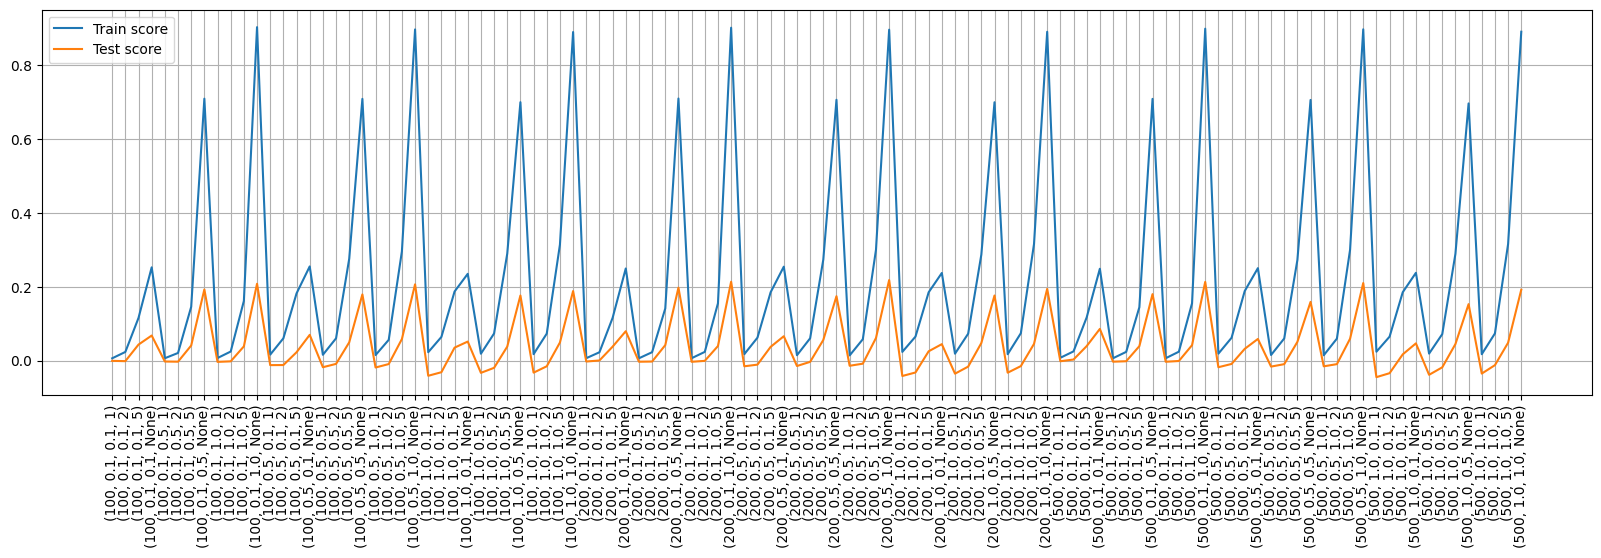

In [80]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(len(hyperparameter_combinations)), train_scores, label = 'Train score')
plt.plot(range(len(hyperparameter_combinations)), test_scores, label = 'Test score')
plt.xticks(range(len(hyperparameter_combinations)), hyperparameter_combinations, rotation = 90)
plt.legend()
plt.grid()


0.2371201197663828


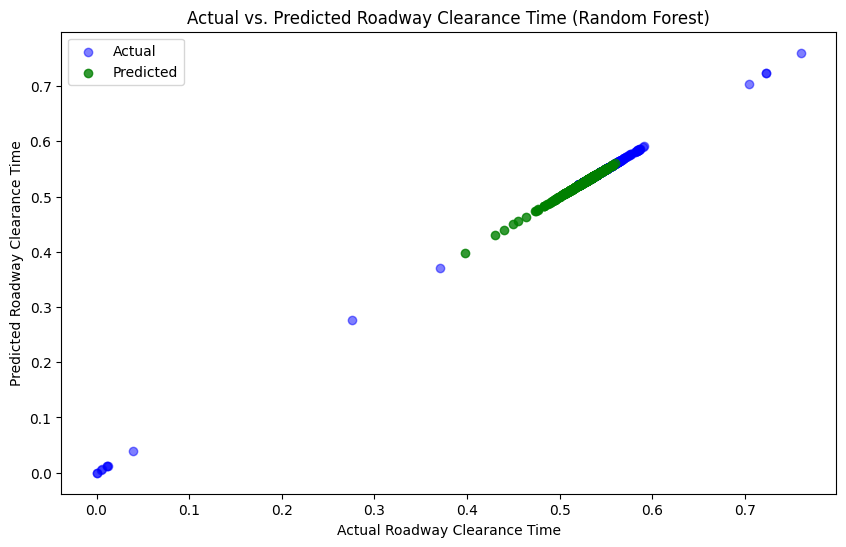

,Actual,Predicted
410,0.520397,0.528418
5295,0.525175,0.532821
2803,0.533995,0.532990
3958,0.546490,0.535077
4578,0.520029,0.539372
642,0.523705,0.530689
4447,0.527012,0.523181
3903,0.535832,0.534960
1840,0.544285,0.521479
486,0.542815,0.541466


In [81]:
import matplotlib.pyplot as plt

# Train the Random Forest model on the entire training dataset
rf_model = RandomForestRegressor(random_state=0, 
                                             n_estimators=200,
                                             max_samples=0.1, 
                                             max_features=1.0, 
                                             max_depth=None)
rf_model.fit(X_train, y_train)

print(rf_model.score(X_train, y_train))

# Make predictions on the test dataset 
y_pred = rf_model.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot the actual target values in blue and predicted values in green
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test, color='blue', label='Actual', alpha=0.5)  # Scatter plot of actual values
plt.scatter(y_pred, y_pred, color='green', label='Predicted', alpha=0.8)  # Scatter plot of predicted values
plt.xlabel('Actual Roadway Clearance Time')
plt.ylabel('Predicted Roadway Clearance Time')
plt.title('Actual vs. Predicted Roadway Clearance Time (Random Forest)')
plt.legend()
plt.show()
results_df.head(10)

<h4>Important Features <h4>


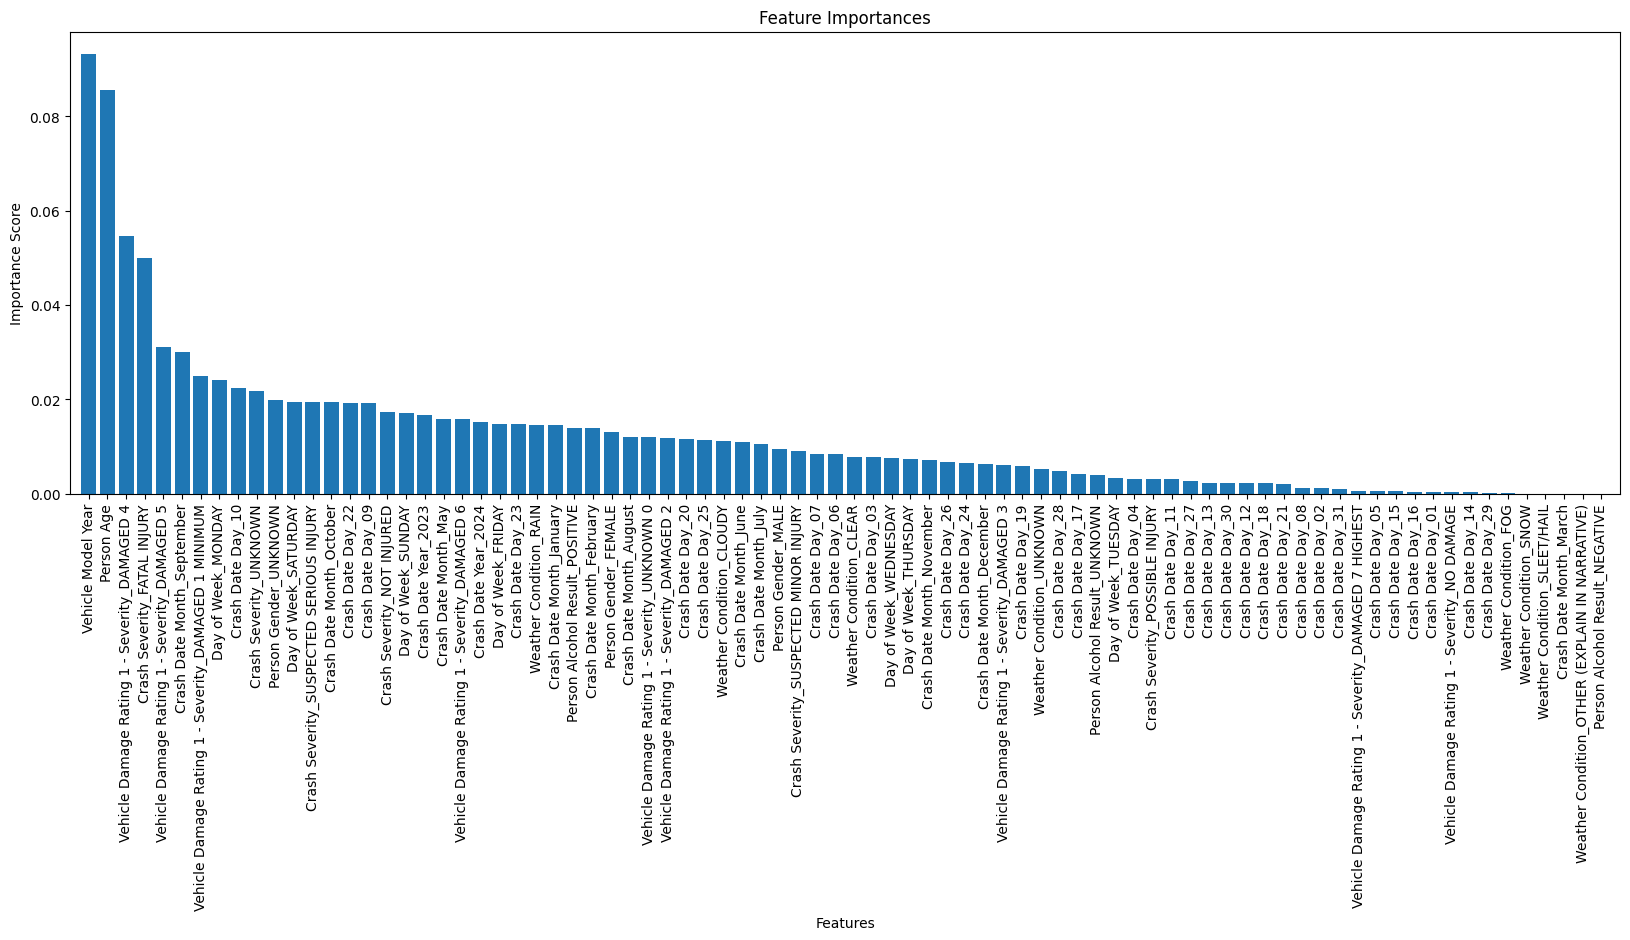

In [82]:
from sklearn.ensemble import RandomForestRegressor



# Train Random Forest model to get feature importances
rf_model = RandomForestRegressor(random_state=0, 
                                             n_estimators=100,
                                             max_samples=0.1, 
                                             max_features=1.0, 
                                             max_depth=None)
rf_model.fit(X_train, y_train)
importances=rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plotting
plt.figure(figsize=(20, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

### Regression prediction

In [83]:

y_pred_test = rf_model.predict(df_cleaned_scaled_test)

In [84]:
y_pred_test

array([0.53073135, 0.53416759, 0.53667769, 0.53242558, 0.53229327,
       0.53083793, 0.53095553, 0.53111724, 0.532945  , 0.52851158,
       0.52961779, 0.53318265, 0.53315325, 0.52686512, 0.5285667 ,
       0.53230062, 0.5347556 , 0.52364694, 0.52954429, 0.53477398,
       0.53769202, 0.53341051, 0.53044836, 0.53737596, 0.53800074,
       0.52869901, 0.53391033, 0.52886071, 0.53471518, 0.52560823,
       0.48979419, 0.53056229, 0.53359427, 0.51060272, 0.48439912,
       0.55330761, 0.55138184, 0.56103271, 0.55440279, 0.53994487,
       0.52517457, 0.53289599, 0.53331863, 0.5330136 , 0.52842705,
       0.5338846 , 0.53520029, 0.5339581 , 0.53552003, 0.53483646,
       0.53319368, 0.52715178, 0.53436604, 0.54036751, 0.53726939,
       0.53803014, 0.52870636, 0.5338993 , 0.52262404, 0.53095921,
       0.53120176, 0.5262183 , 0.52769202, 0.53953326, 0.53978317,
       0.53343624, 0.53327821, 0.53360162, 0.53341786, 0.53327453,
       0.51510107, 0.50593532, 0.52380007, 0.52752664, 0.53561